In [1]:
import matplotlib.pyplot as mp
import numpy as np
import optical
import lightcurves
import sys
#from ipywidgets import widgets
%matplotlib inline 


In [2]:
target = 'NGC7078'
folder = '/Users/jrneeley/CRRP/'+target+'/'
optical_folder = '/Users/jrneeley/CRRP/OpticalCatalogs/'
#folder = '/Users/Jill/CRRP/'+target+'/'
#optical_folder = '/Users/Jill/CRRP/OpticalCatalogs/'

## Read in variables from Clement catalog

In [15]:
#dtype1 = np.dtype([('id', 'S10'), ('period', float)])
#data = np.loadtxt(folder+target+'-clement.txt', dtype=dtype1, usecols=(0,3))
dtype2 = np.dtype([('id', 'S10'), ('old_period', float), ('new_period', float)])
data = np.loadtxt(folder+'periods-new.txt', dtype=dtype2)

datasets = optical.compile_datasets(target, old=0, folder=folder)





Datasets:

     Y0701  98131 2007-01-13 2007-01-23 k
    lcogt2  72058 2013-03-14 2013-03-23 r
     Y0704  17655 2007-03-31 2007-04-13 b
    zingle  16217 1996-04-16 1996-04-19 g
     west1  12278 2005-02-11 2005-02-13 m
     wfi13  11012 2003-06-04 2003-06-06 c
    lcogt3  10244 2014-03-02 2014-03-02 xkcd:brown
      lee4   8274 2012-02-18 2012-02-23 xkcd:coral
    ct1204   8248 2012-04-24 2012-04-24 xkcd:purple
  efosc08a   7947 2008-04-19 2008-04-19 xkcd:maroon
     bond6   7698 1998-04-17 1998-04-22 xkcd:olive
      wfi6   7019 2002-02-20 2002-02-20 xkcd:tan
      lee2   6096 2011-05-30 2011-06-03 xkcd:grey
     wfi22   5588 2000-02-27 2000-02-27 xkcd:teal
efosc1101b   5559 2011-01-21 2011-01-21 xkcd:tomato
     wfi41   5000 2012-02-24 2012-02-27 xkcd:orchid
     wfi11   4789 1999-12-05 1999-12-05 xkcd:goldenrod
     B1201   4742 2012-01-06 2012-01-11 xkcd:orange
     west2   4530 2005-05-05 2005-05-05 xkcd:khaki
     dec97   4075 1997-12-25 1997-12-25 xkcd:darkgreen
  emmi0601  

V66 0.284


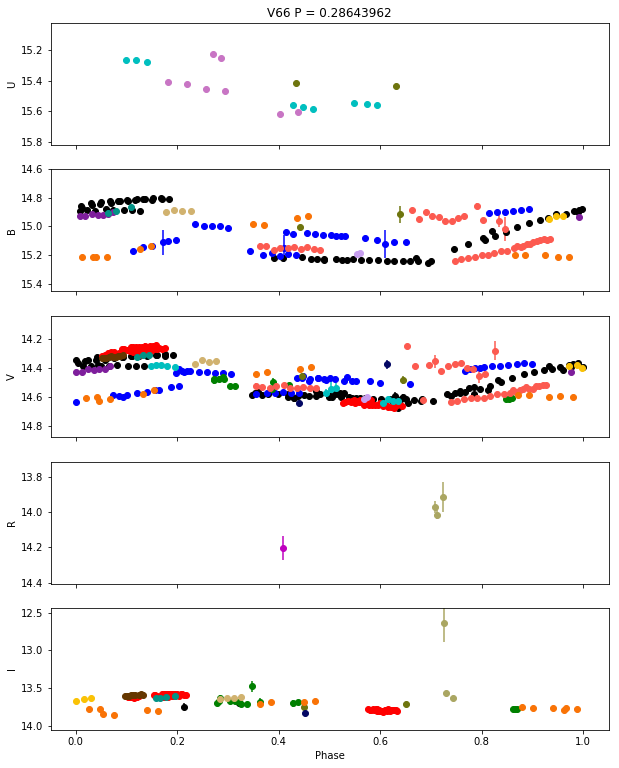

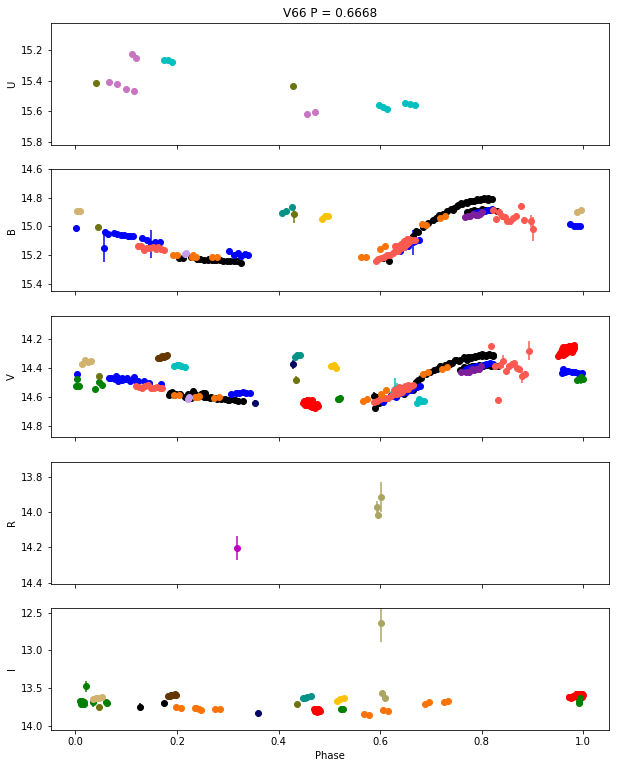

In [9]:
ind=63
print data['id'][ind], data['old_period'][ind]
lcv_file = folder+'lcvs/optical/'+target+data['id'][ind]+'.lcv'
U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)

lightcurves.plot_phased_optical_lcv(U, B, V, R, I, data['new_period'][ind], data['id'][ind], datasets)
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, 0.6668, data['id'][ind], datasets)

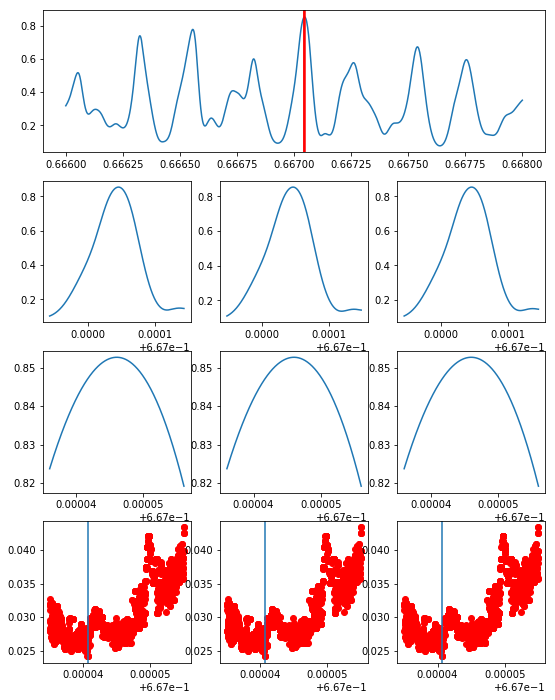

Star  Period  Period_new
V66 0.28643962 0.667040686096


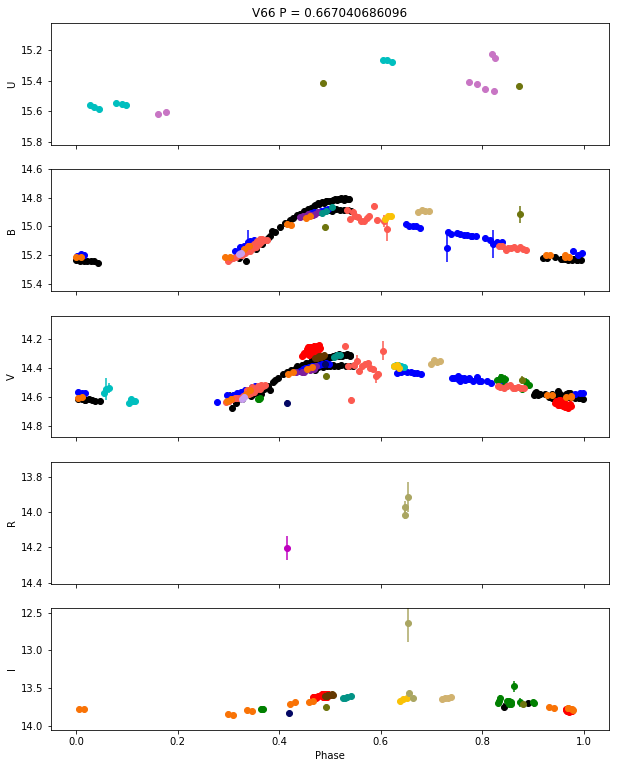

In [12]:
period = lightcurves.period_search_hybrid(B, 0.667, data['id'][ind])
print 'Star  Period  Period_new'
print data['id'][ind], data['new_period'][ind], period
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, period, data['id'][ind], datasets)

In [16]:
for ind2, star in enumerate(data['id']):
    lcv_file = folder+'lcvs/optical/'+target+data['id'][ind2]+'.lcv'
    U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
    lightcurves.plot_phased_optical_lcv(U, B, V, R, I, data['new_period'][ind2], data['id'][ind2], datasets, plot_save=1, folder=folder)

# Generate MIR light curves matching optical ID number

In [48]:
dtype1 = np.dtype([('star', 'S10'), ('dao', int)])
data = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1)

lightcurves.make_lcv(['I1', 'I2'], data['star'], data['dao'], folder=folder)


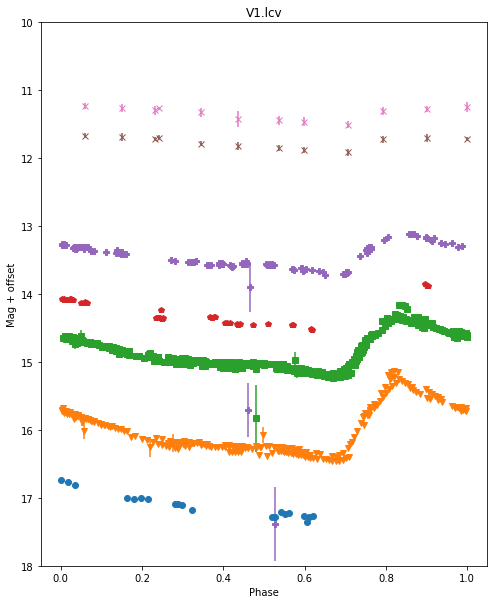

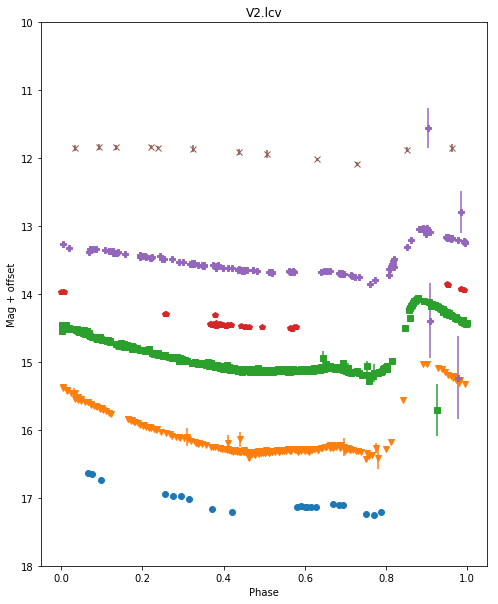

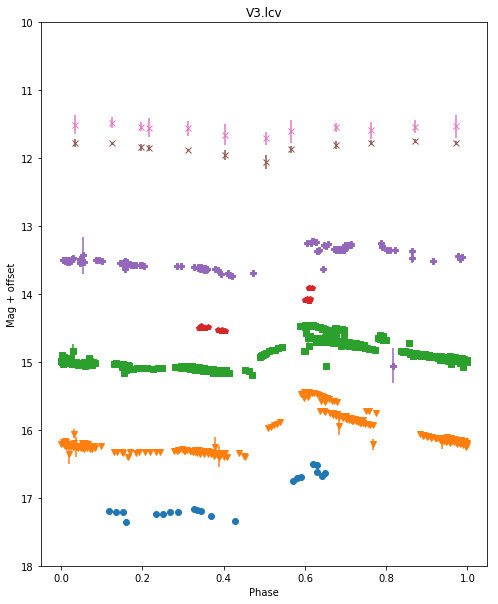

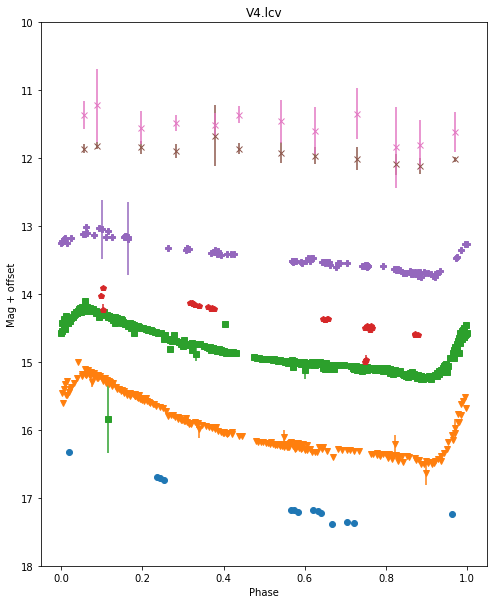

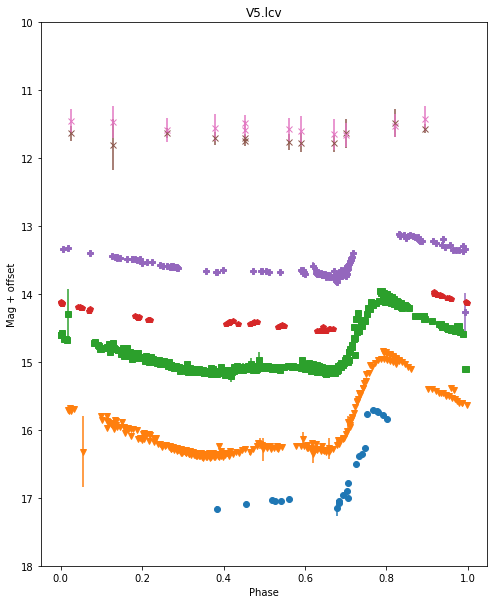

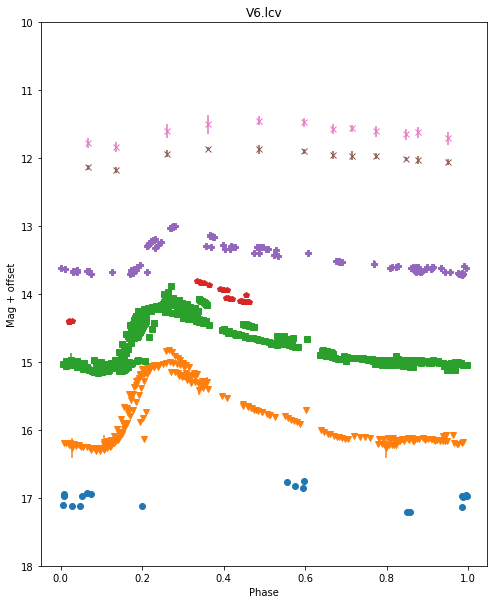

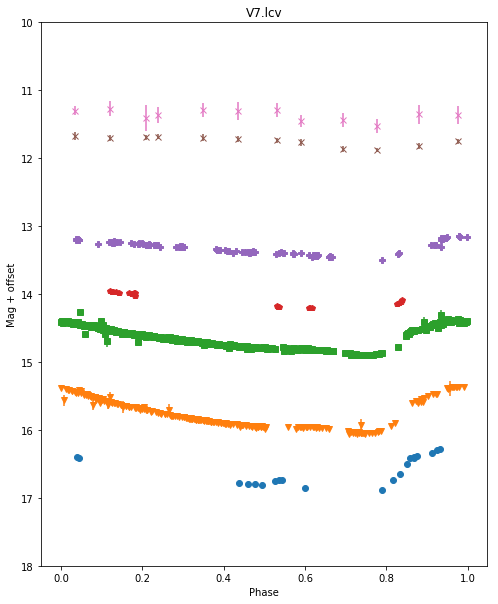

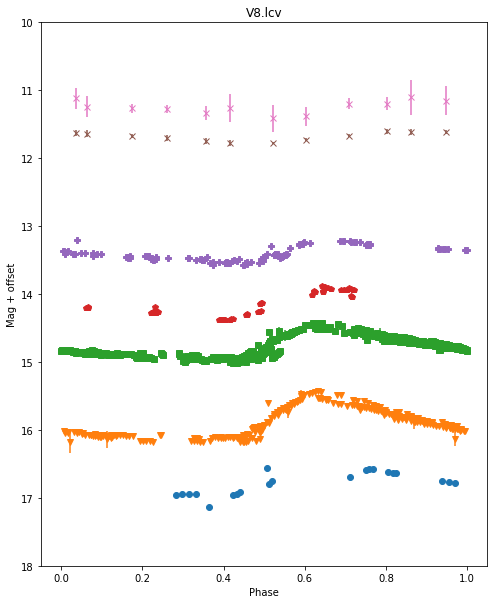

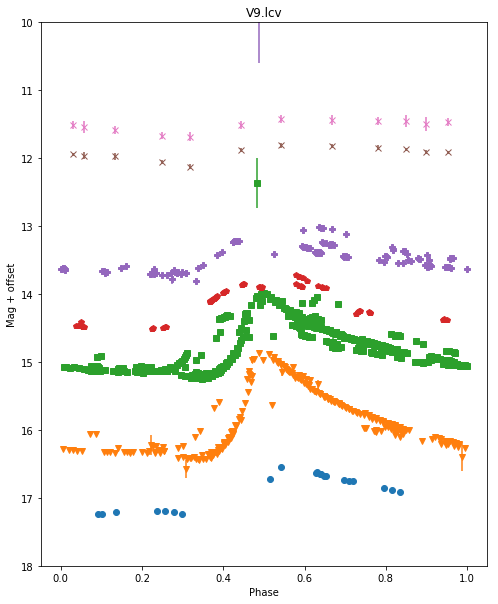

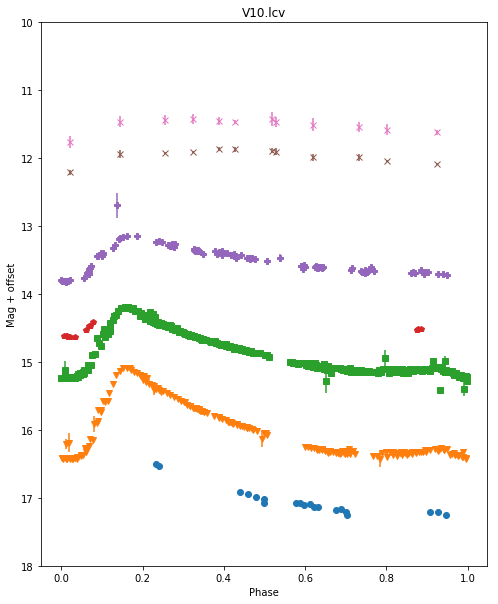

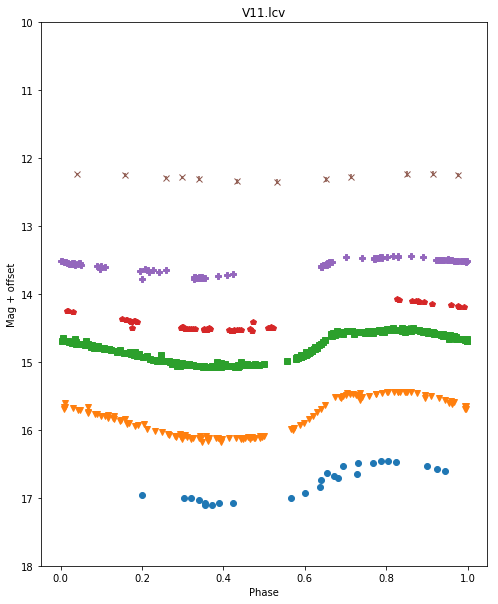

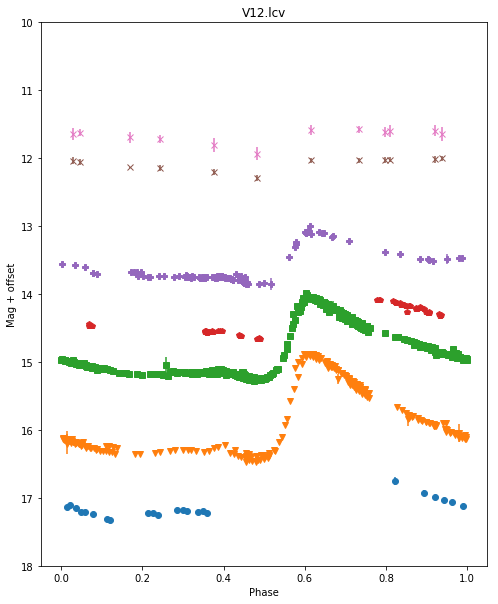

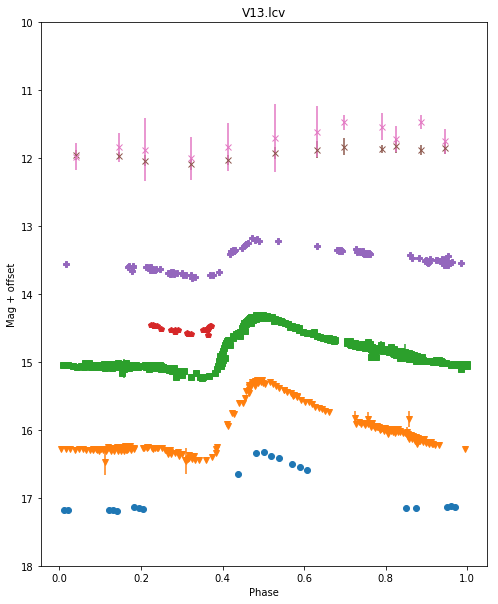

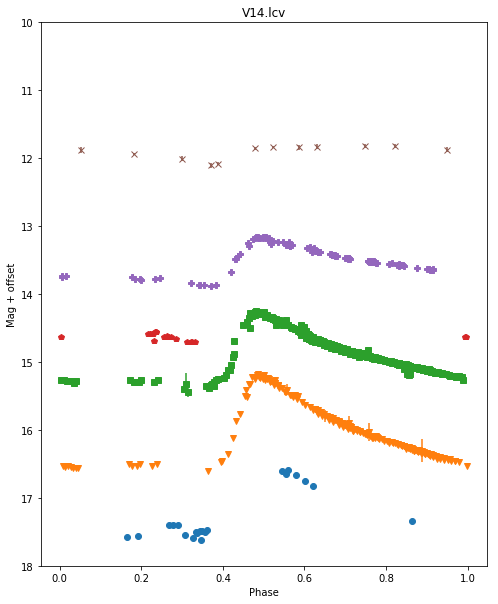

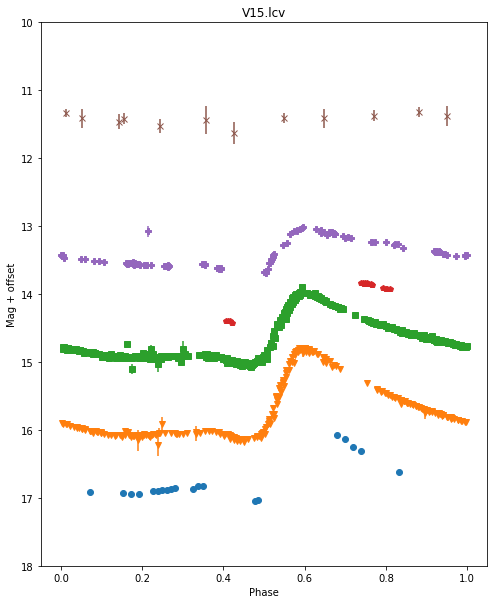

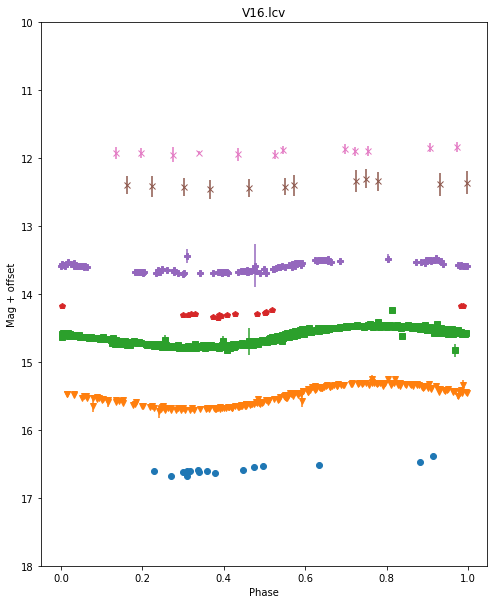

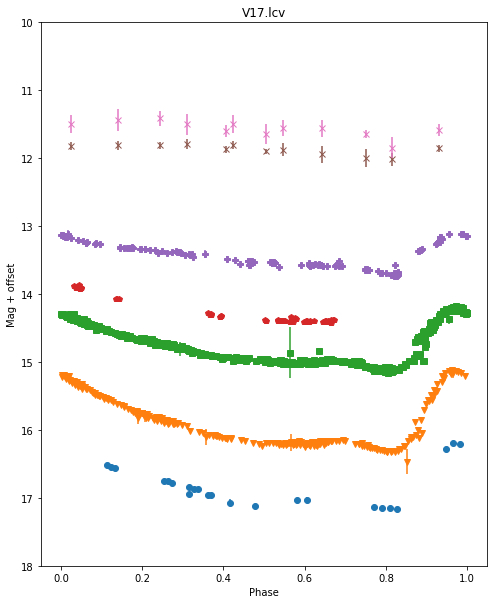

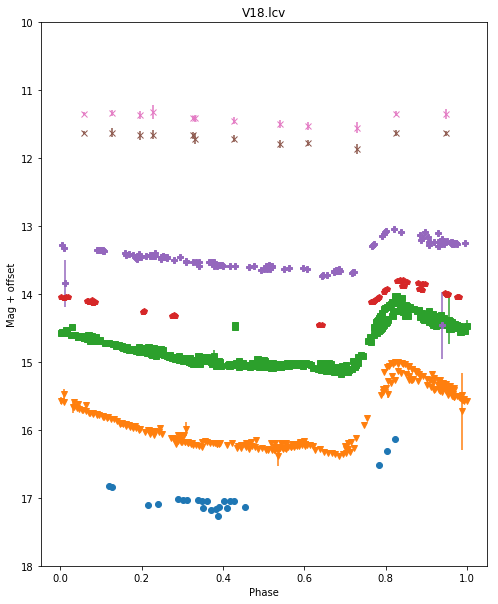

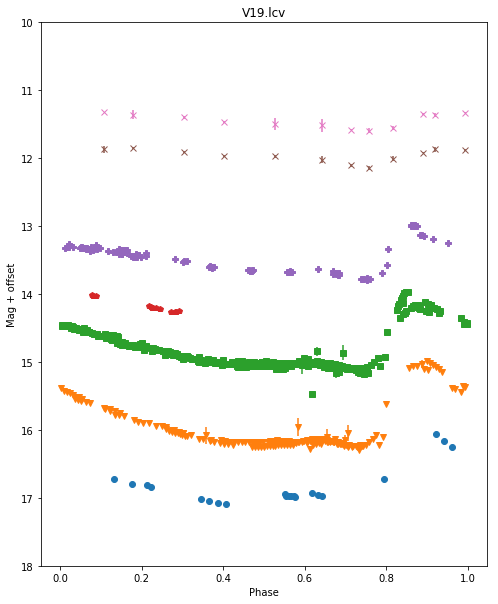

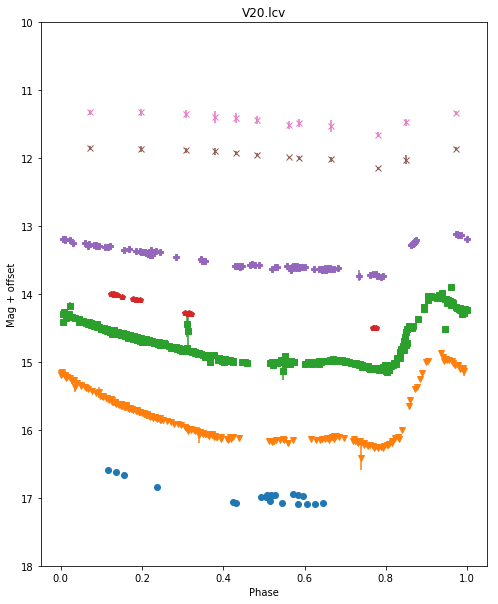

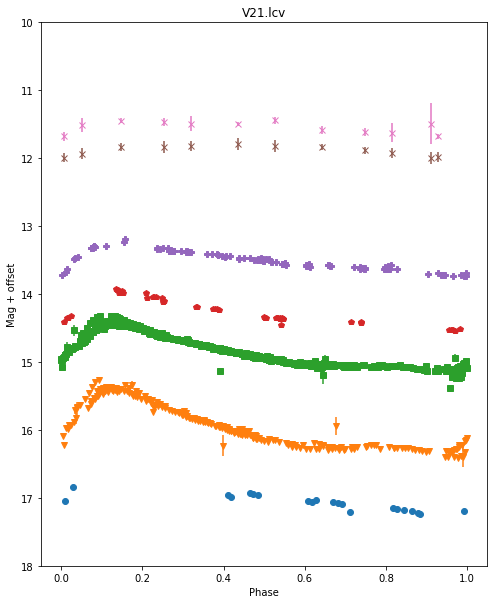

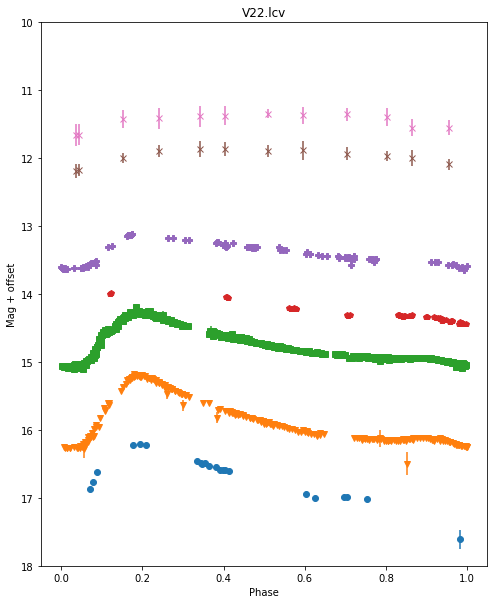

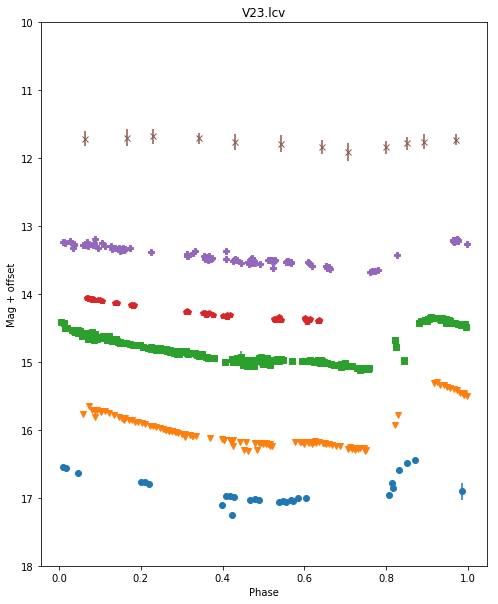

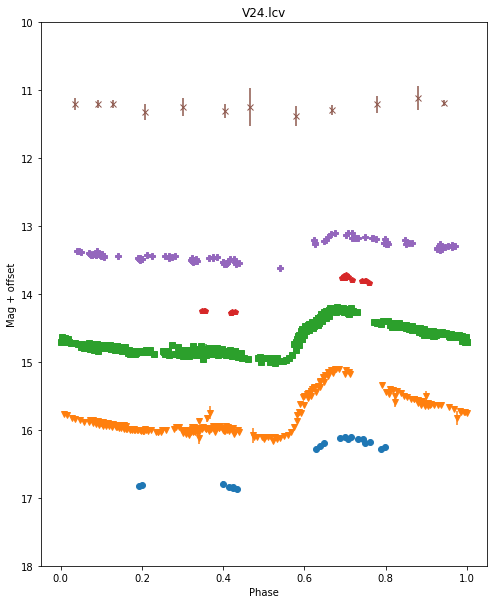

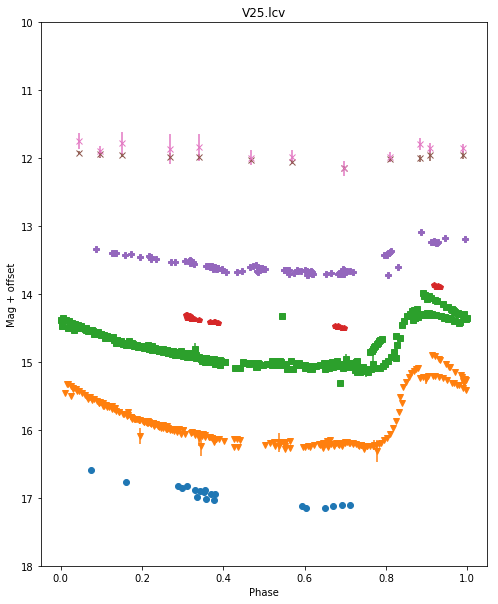

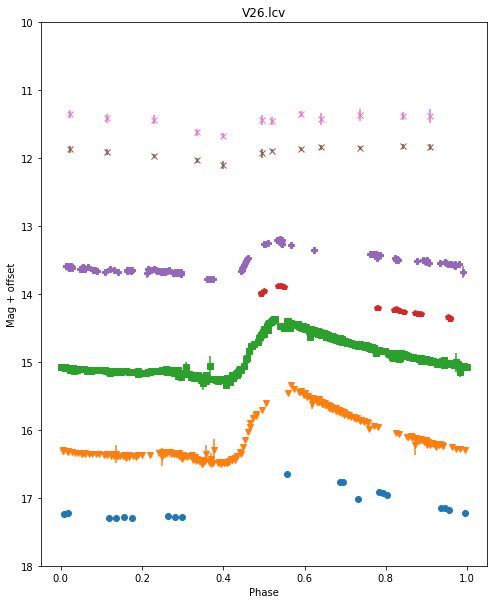

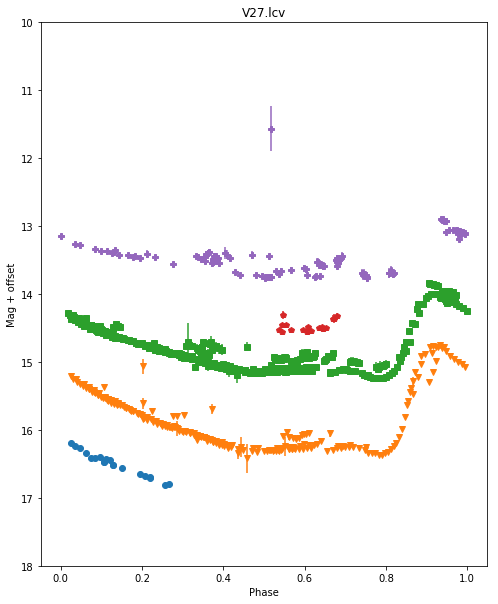

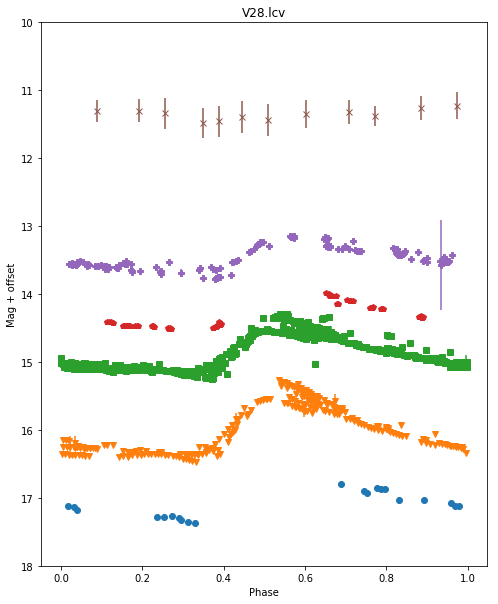

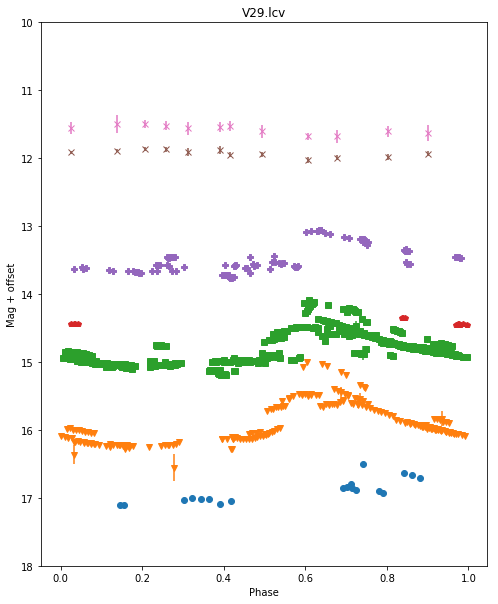

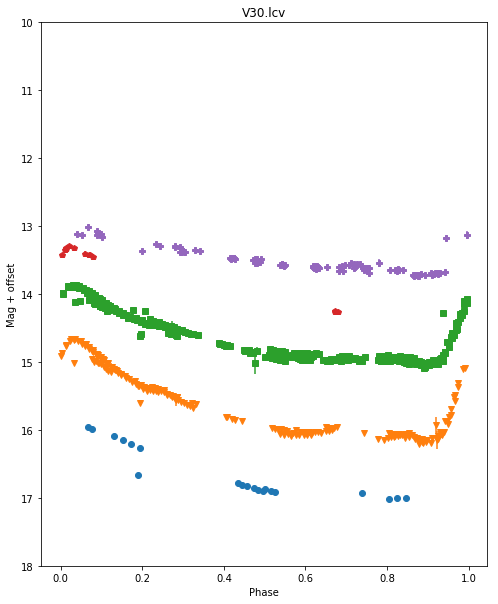

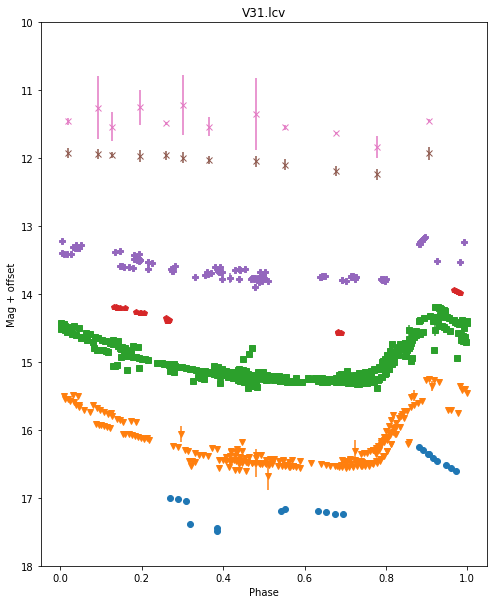

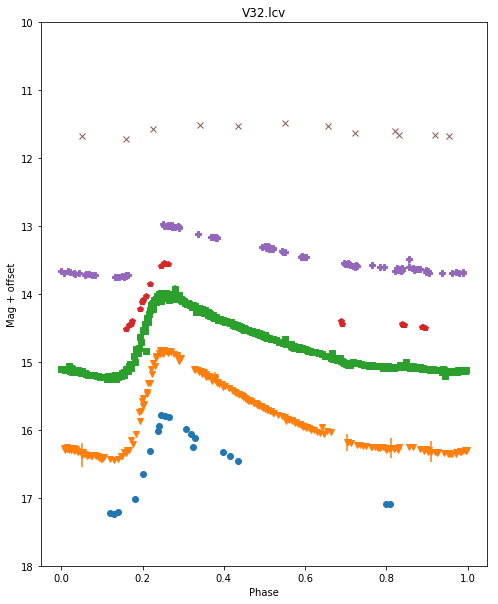

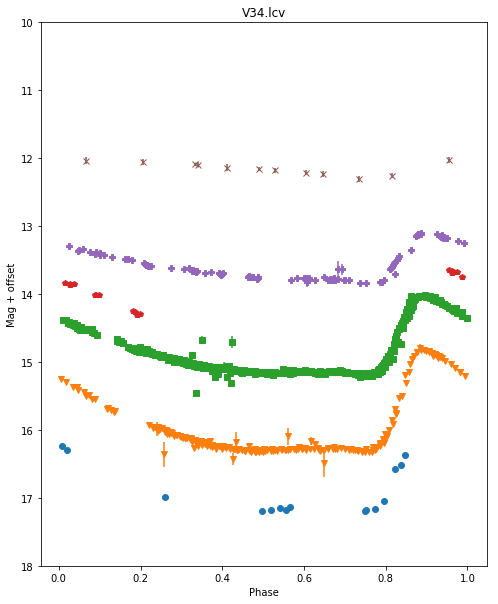

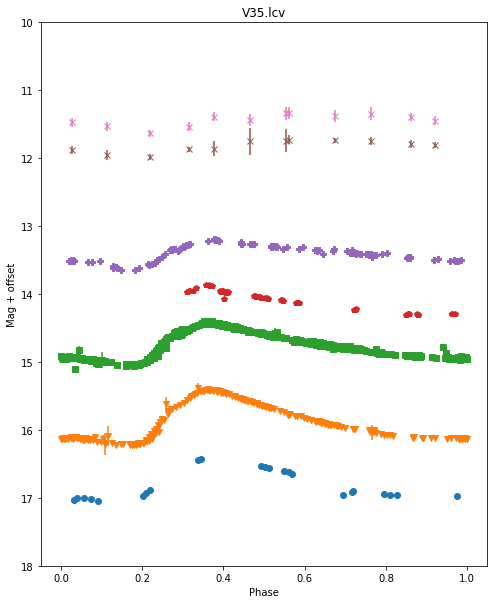

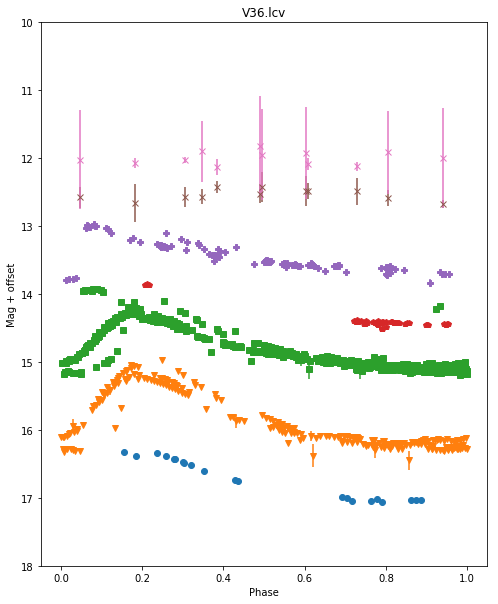

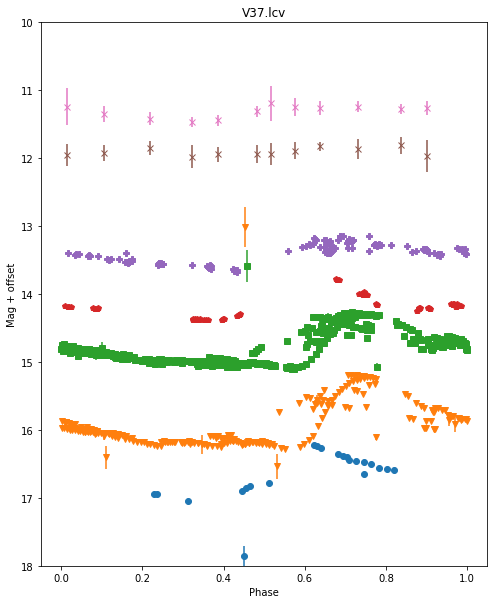

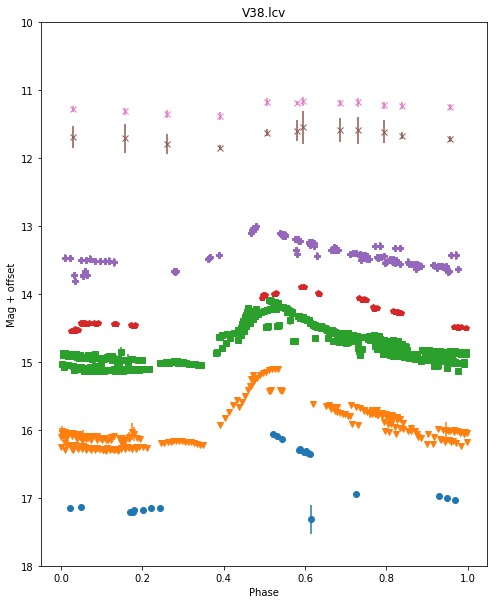

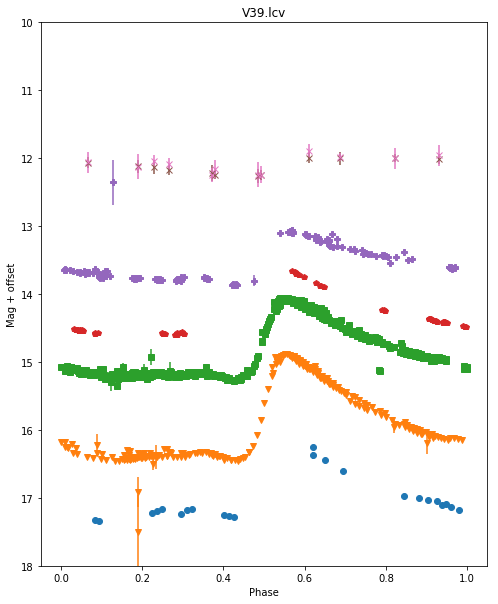

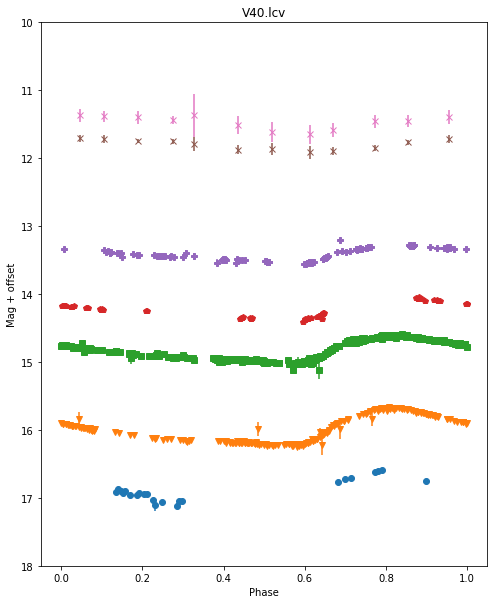

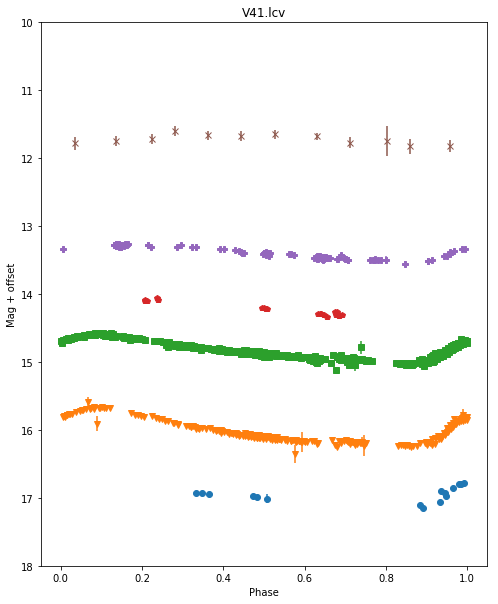

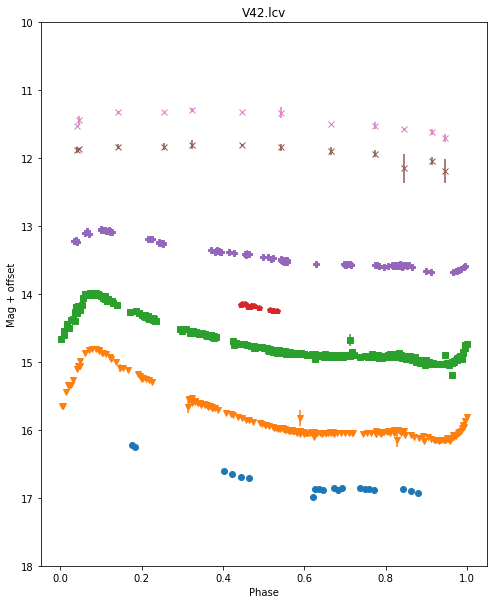

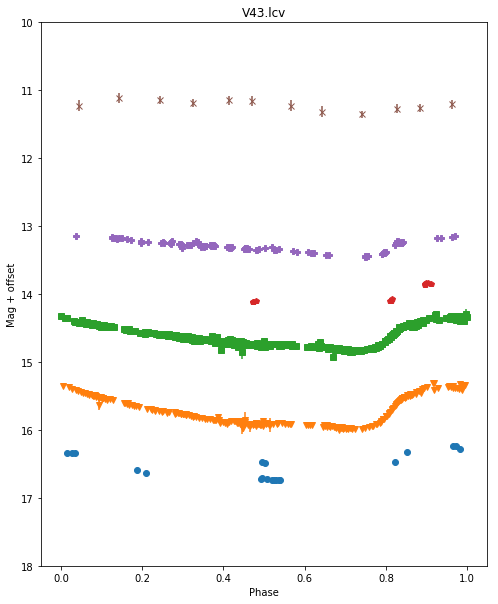

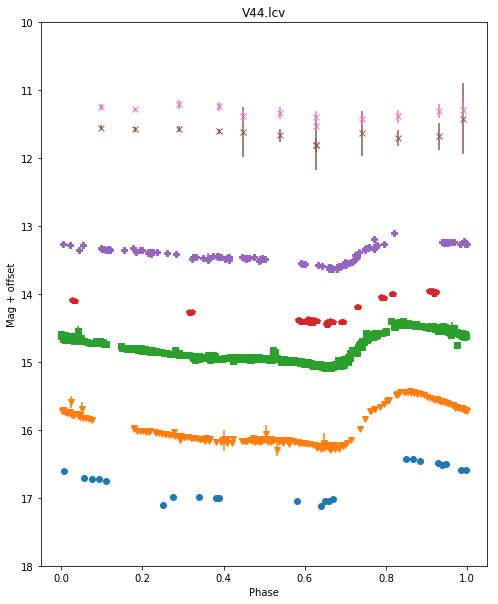

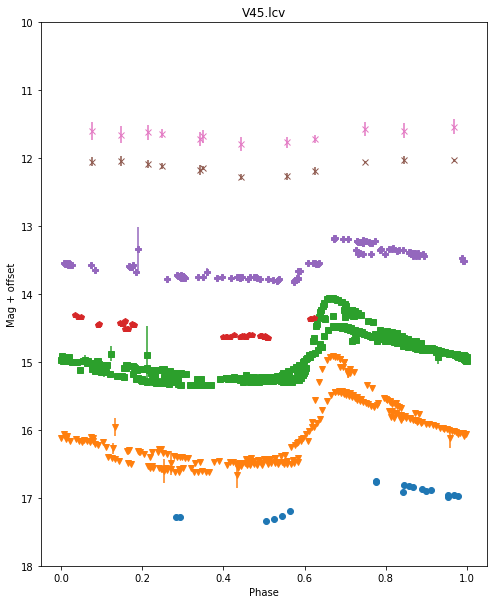

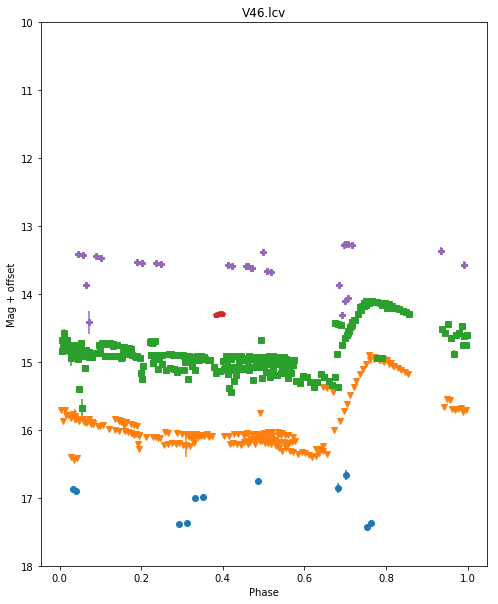

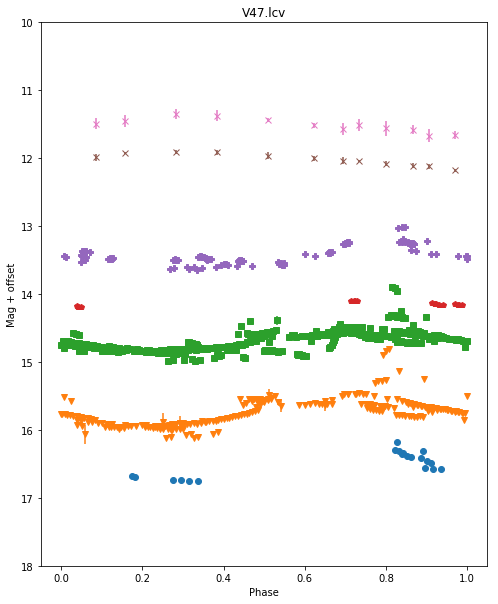

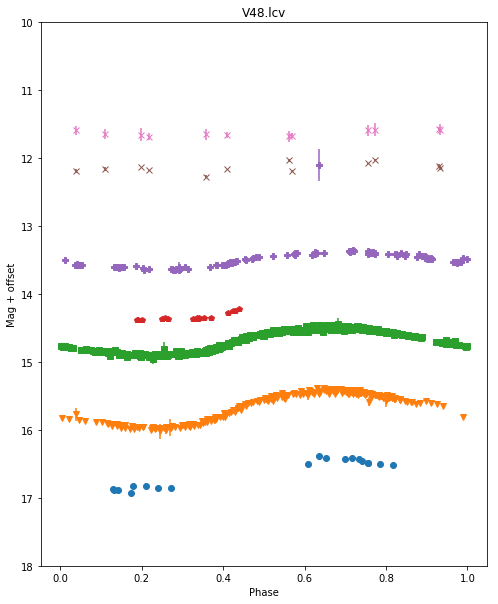

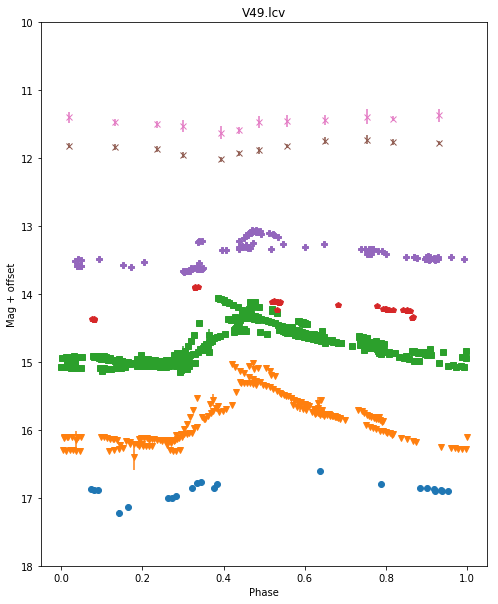

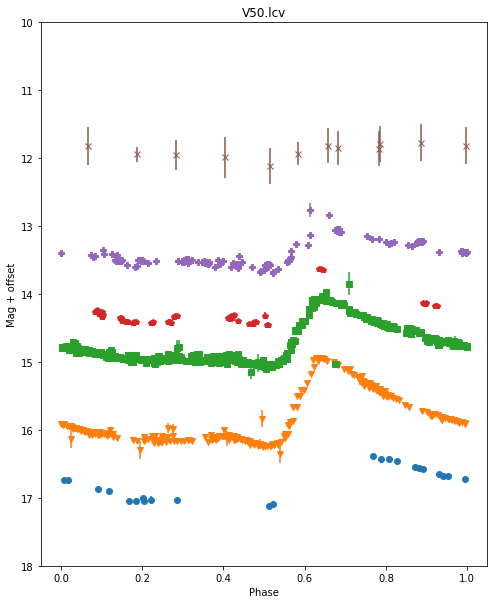

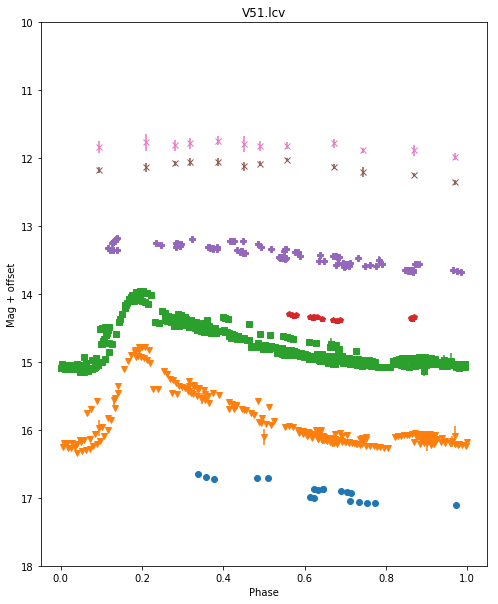

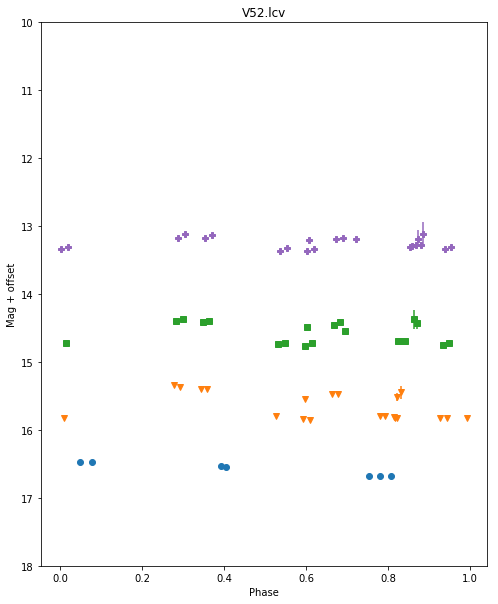

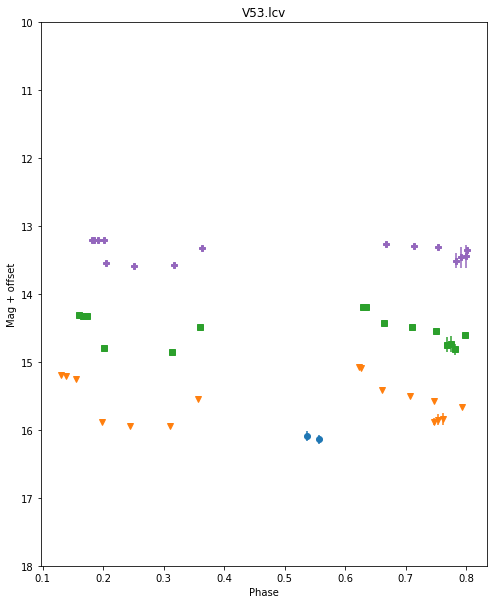

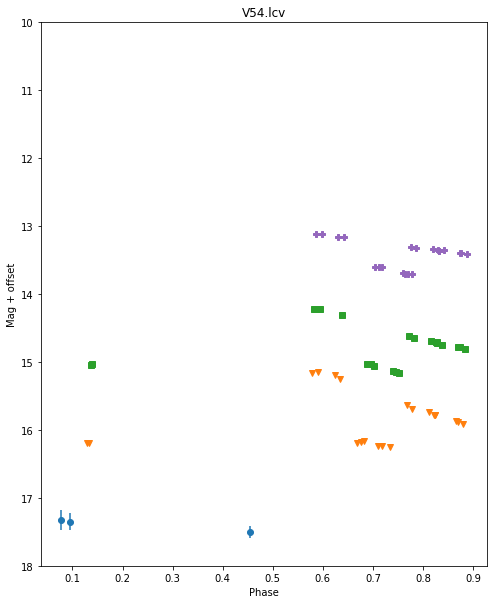

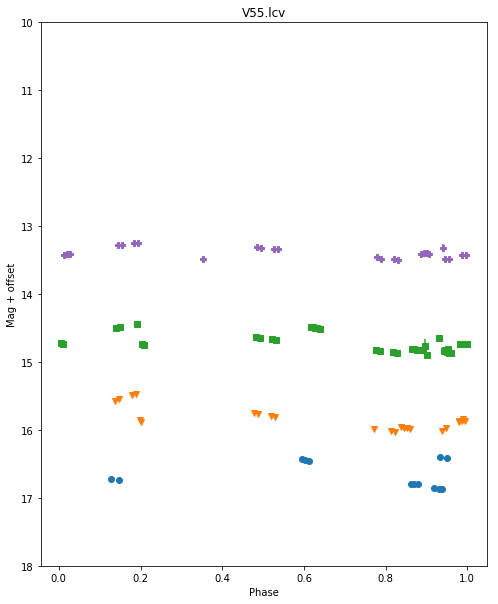

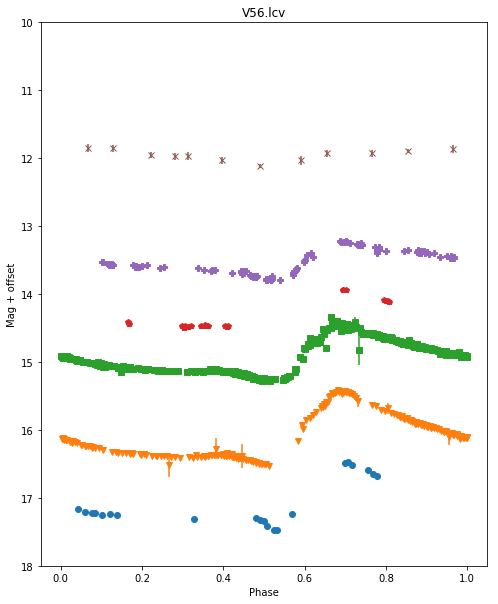

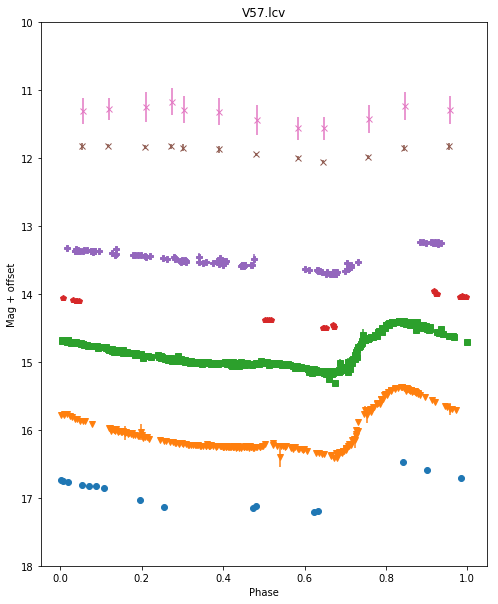

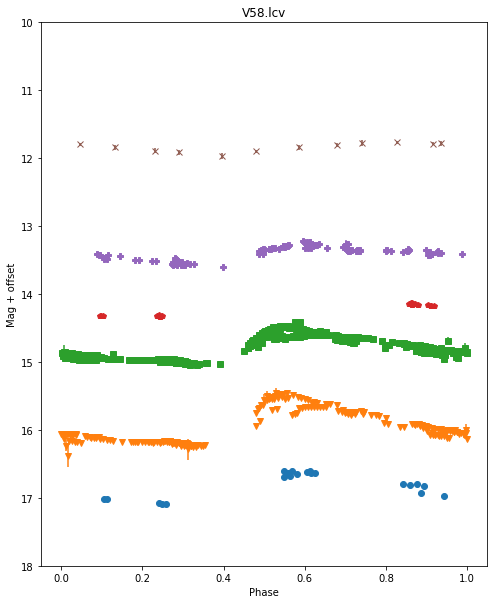

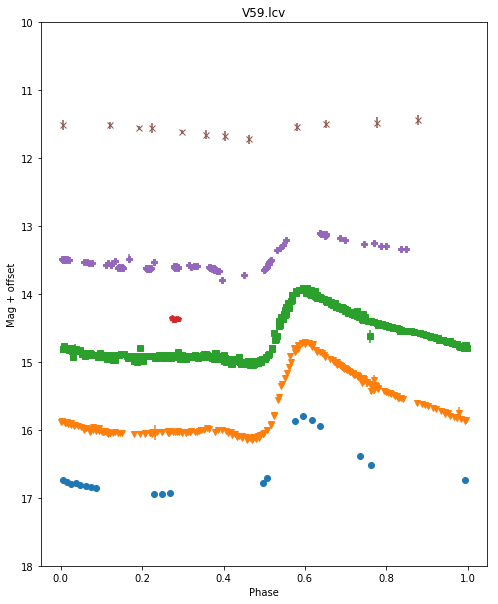

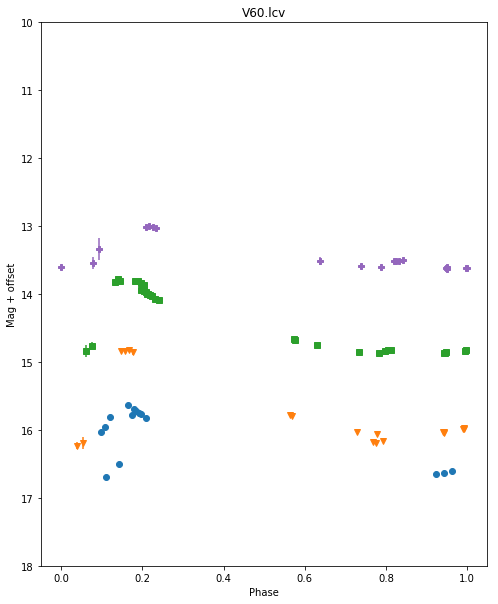

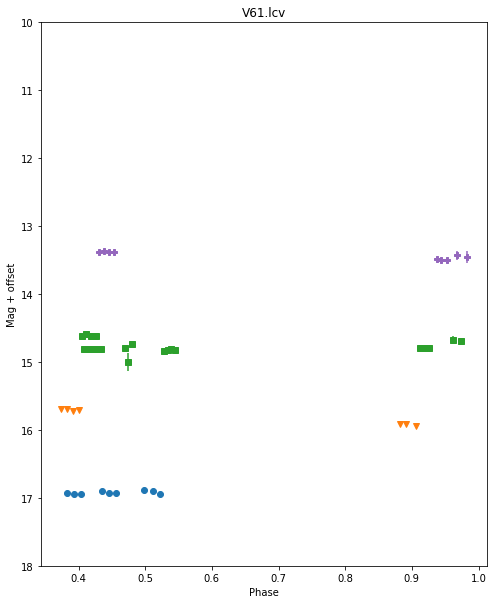

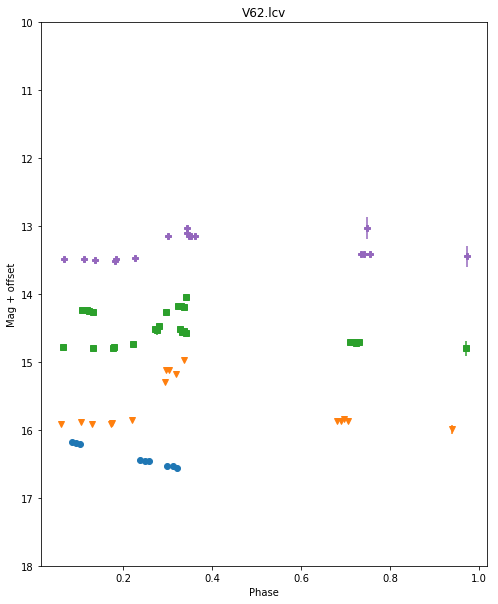

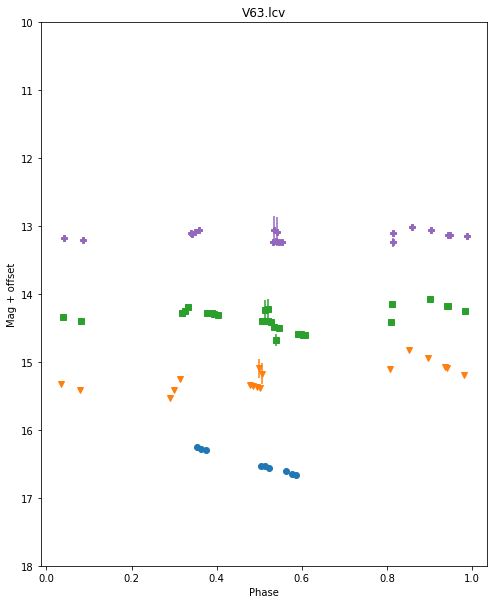

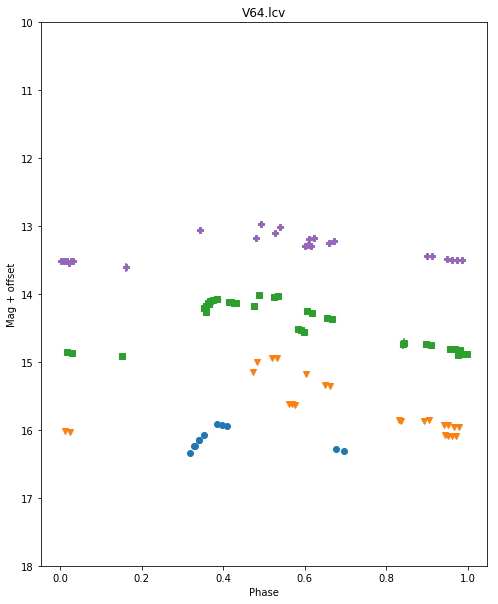

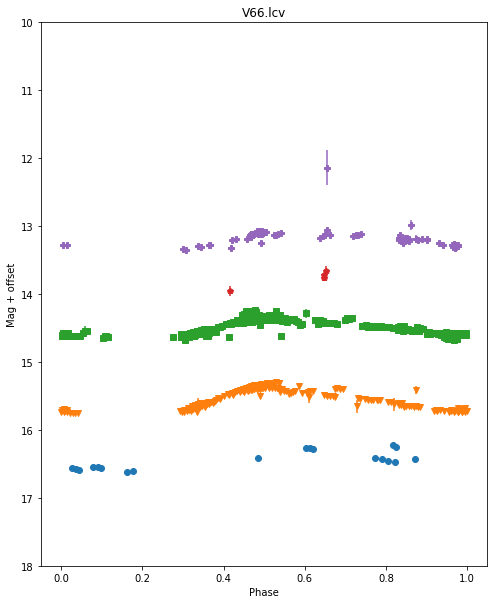

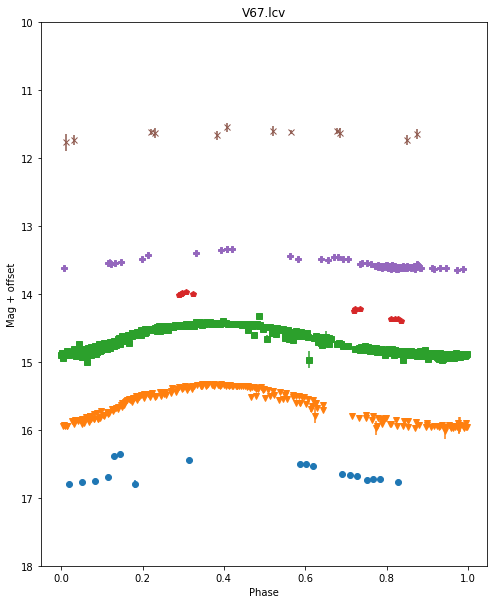

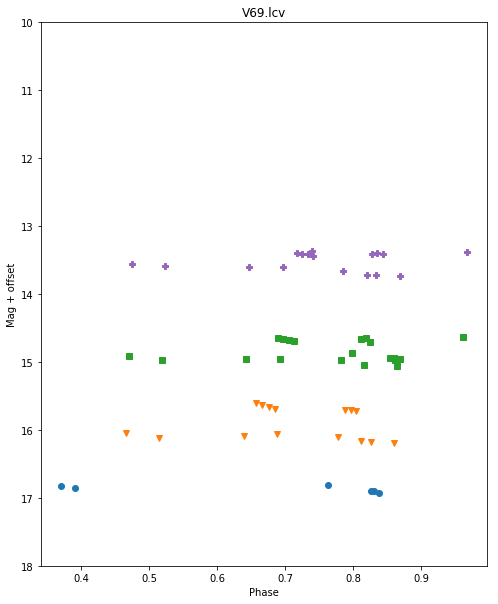

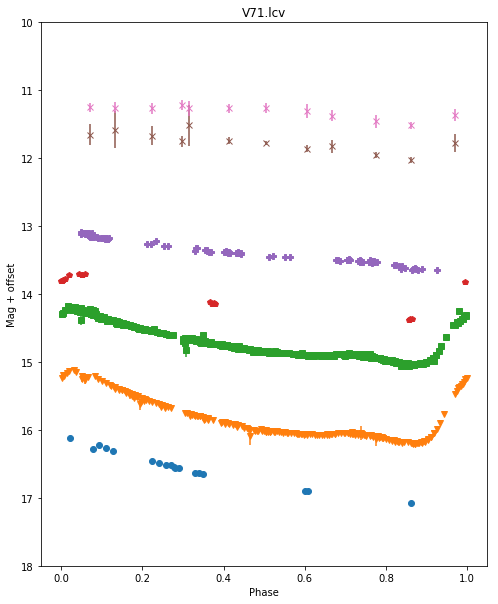

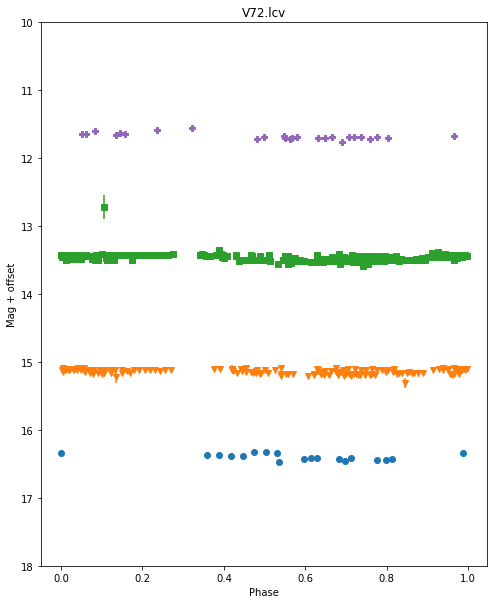

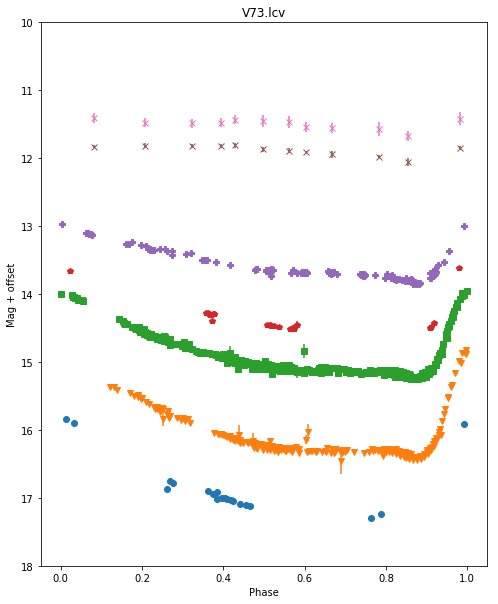

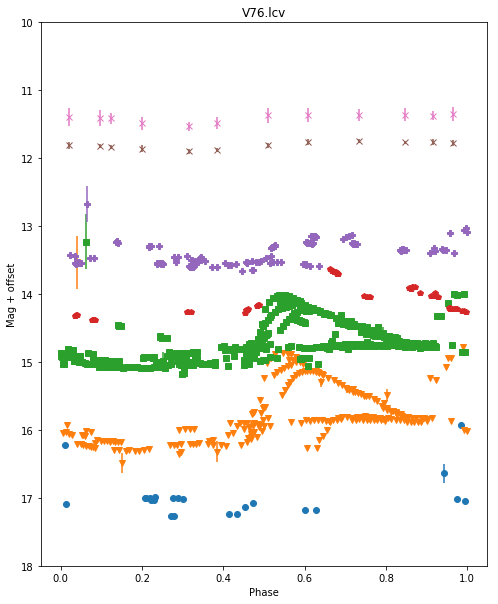

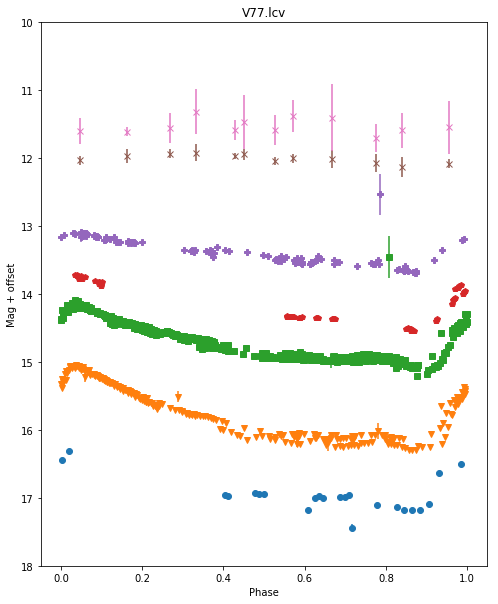

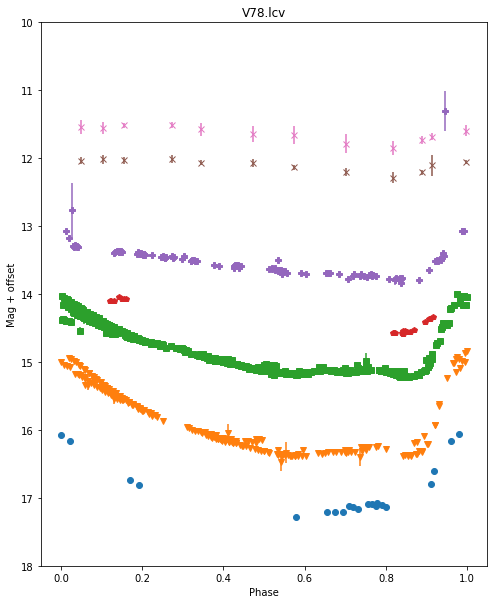

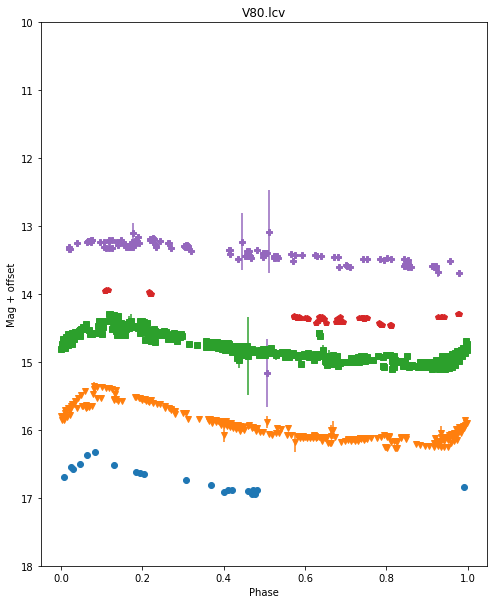

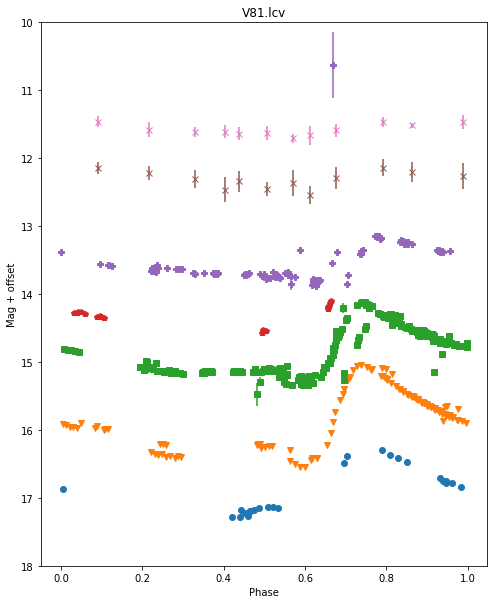

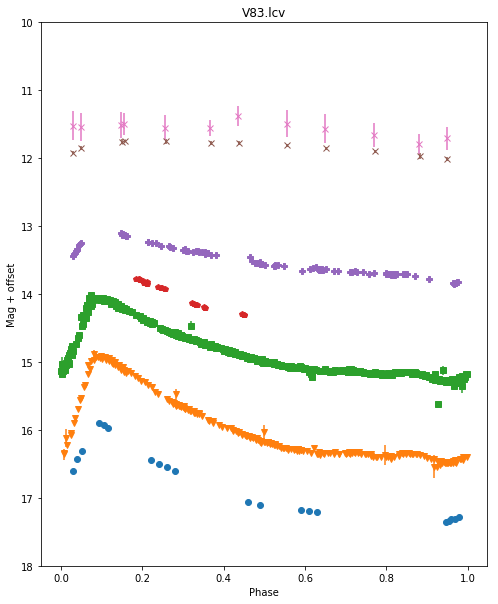

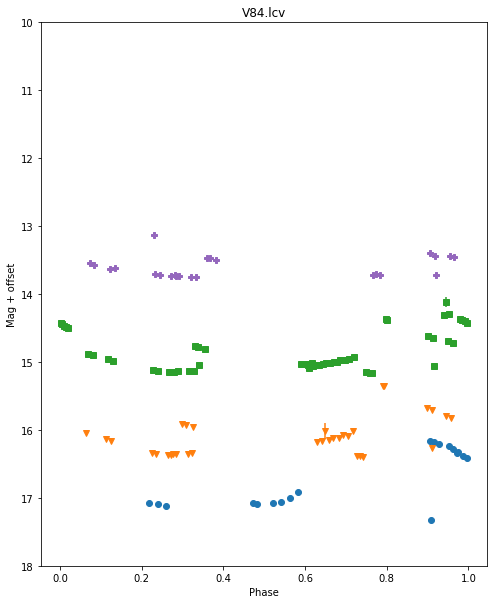

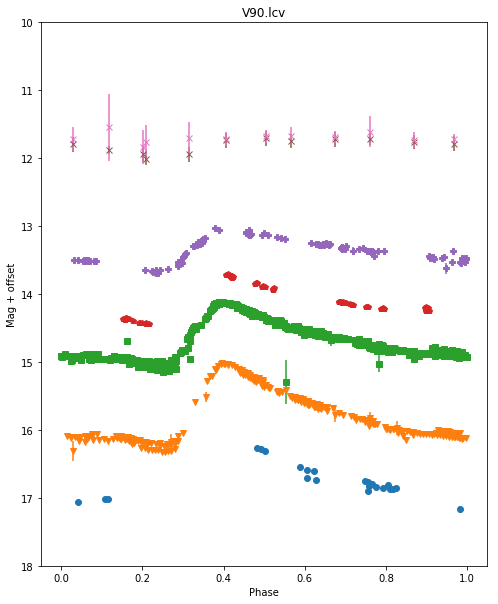

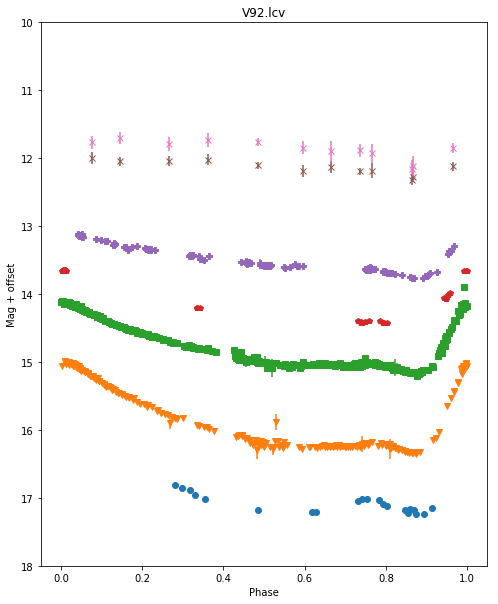

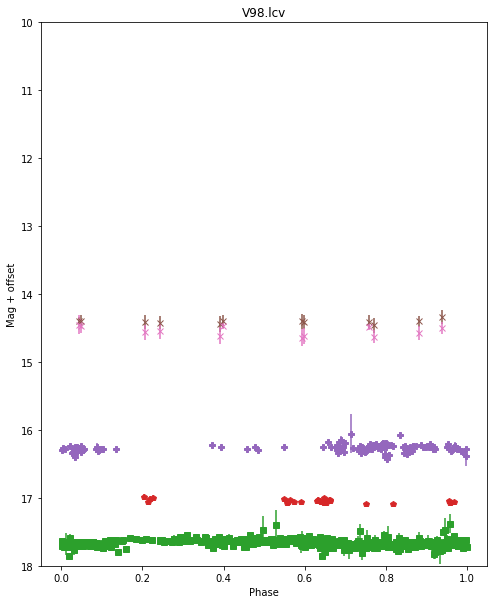

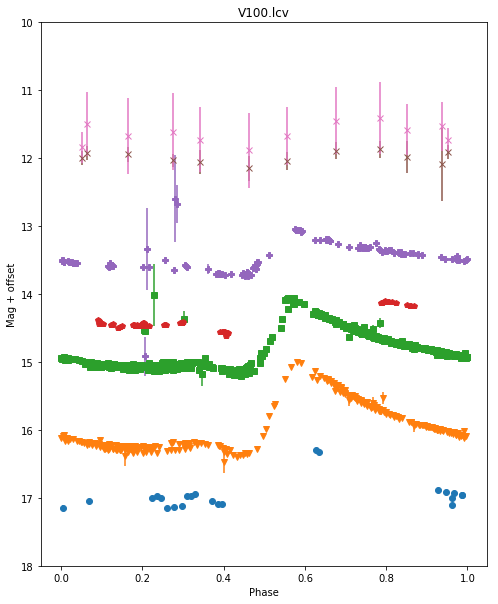

In [17]:
dtype1 = np.dtype([('id', 'S4'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+'periods-new.txt', dtype=dtype1, usecols=(0,1,2))
for ind, star in enumerate(data['id']):
    try:
        if np.isnan(data['new_period'][ind]):
          #  lightcurves.phase_lcv(folder+'lcvs/mir/'+star+'.lcv', data['cc_period'][ind], 0, save=1)
            lightcurves.phase_lcv_all_bands(target, star+'.lcv',data['cc_period'][ind], 0, bin_mir=1, folder=folder)
        else:
          #  lightcurves.phase_lcv(folder+'lcvs/mir/'+star+'.lcv', data['new_period'][ind], 0, save=1)
            lightcurves.phase_lcv_all_bands(target, star+'.lcv',data['new_period'][ind], 0, bin_mir=1, folder=folder)
    except:
        print star, ' not found.'
        continue

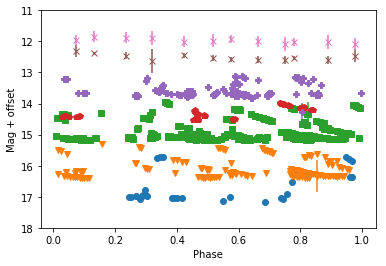

In [7]:
lightcurves.phase_lcv_all_bands(target, 'V5.lcv',0.63001681, 0, optical_lcv=1, mir_lcv=1, bin_mir=1)

/Users/jrneeley/CRRP/NGC3201/lcvs/V4.phased


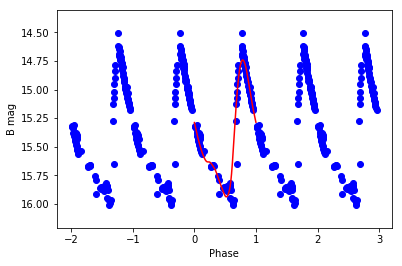

B 15.3609216063 1.19658311079


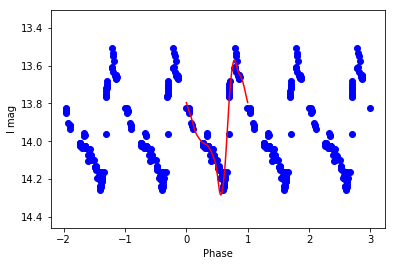

I 13.8991747816 0.714946296132


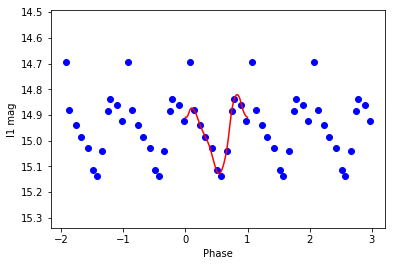

I1 14.954721289 0.307169760369


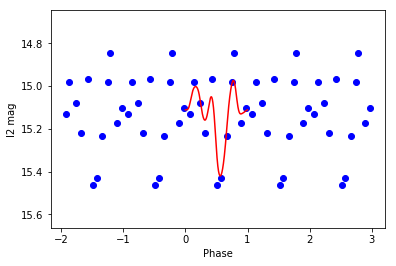

I2 15.1237176349 0.446333936528


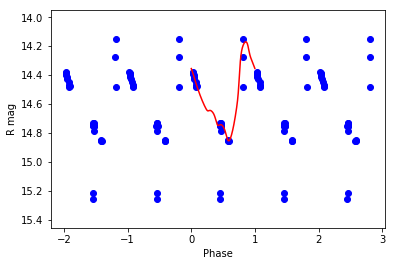

R 14.5326872955 0.683948887


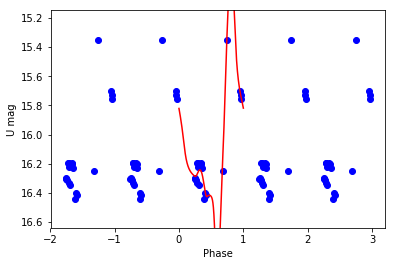

U 15.9125939993 2.10002461504


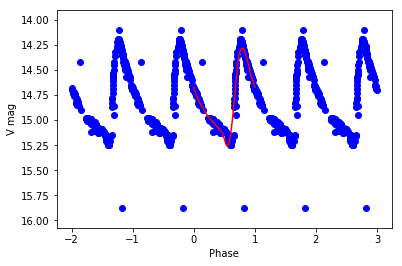

V 14.7757498575 0.9744456064


In [6]:
r1, r2 = lightcurves.gloess(folder+'lcvs/V4.phased')

[ 0.67722373  0.68716791  0.68983549  0.69573402  0.69691218  0.7051499
  0.71959622  0.72705667  0.7275711   0.73648462]


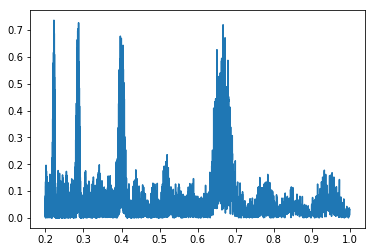

array([ 0.39692747,  0.22335649,  0.22293817,  0.66682227,  0.28487991,
        0.28618449,  0.6670002 ,  0.2871708 ,  0.22232351,  0.22234329])

In [4]:
lcv_file = folder+'lcvs/optical/'+target+'V66.lcv'
U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)

lightcurves.period_search_LS(V,'V66')